In [412]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# 1. Regression

## 1.1 Unconstrained


### 1. Multilinear Regression

#### Importing the data
We're importing the data from the lin_regression folder of the DATA PA folder(For me it was the index 21). 
We're also shuffling the data and splitting the data in a 70:30 split of the data.

In [413]:
linearRegData = np.loadtxt("DATA PA/lin_regression/regression_data_021.txt", delimiter=",", skiprows=1)
np.random.shuffle(linearRegData)
trainSplit = linearRegData[0:800, :]
testSplit = linearRegData[800:1000, :]


In [414]:
#Adding the bias term in the equation
sensorData = trainSplit[:, 0:10]
sensorData = np.c_[sensorData, np.ones(len(sensorData)).reshape(len(sensorData),1)]
positionData = trainSplit[:, 10:13]
print("SensorData shape : {} and positionData shape: {}".format(sensorData.shape, positionData.shape))

SensorData shape : (800, 11) and positionData shape: (800, 3)


In [415]:
normedSensorData = []
normedPositionData = []
for i in range(len(sensorData)):
    normedSensorData.append(np.linalg.norm(sensorData[i, :]))
    normedPositionData.append(np.linalg.norm(positionData[i, :]))

In [416]:
sensorData.shape

(800, 11)

#### Minimization Problem
We can see a (somewhat) linear trend between the normed sensor data and the normed position data. <br>
We have the feature matix as $\textbf{sensorData}$. We'd add a bias column to the $\textbf{sensorData}$, let's call that as $A$ and the corresponding position vector as $Y$.<br>
Let the weights of the minimzation problem be $X$<br>
We have the optimisation problem $X$ as $$argmin_{X} f(X) = \frac{1}{2}||AX-Y||^2$$ <br>
Expanding this function, we'd have $$f(x) = X^TA^TAX - X^TA^TY - Y^TAX + Y^TT$$
Taking the gradient, we've $$\nabla f(x) = A^TAX - A^TY$$
To minimise the function we need to take the $\nabla f(x) = 0$, i.e. $$A^TAX - A^TY = 0 \implies A^TAX = A^TY$$ 
We'd need to solve this equation and get the weights, $X$

In [417]:
positionData.shape

(800, 3)

In [418]:
positionData = sensorData.T @ positionData
positionData.shape

(11, 3)

In [419]:
sensorData = sensorData.T @ sensorData 
sensorData.shape

(11, 11)

In [420]:
#Using the least-squares solution to a above linear matrix equation.
weights, residuals, rank, s = np.linalg.lstsq(sensorData, positionData, rcond=None)
def MSE(calculatedData, positionData):
    errorTerms0 = calculatedData[0] - positionData[0]    
    errorTerms1 = calculatedData[1] - positionData[1]    
    errorTerms2 = calculatedData[2] - positionData[2]    
    
    squaredErrors0 = [errorTerms0[i] **2 for i in range(len(errorTerms0))]
    squaredErrors1 = [errorTerms1[i] **2 for i in range(len(errorTerms1))]
    squaredErrors2 = [errorTerms2[i] **2 for i in range(len(errorTerms2))]

    meanSquaredError0 = round(np.mean(squaredErrors0),3)
    meanSquaredError1 = round(np.mean(squaredErrors1),3)
    meanSquaredError2 = round(np.mean(squaredErrors2),3)
    # print("Mean Square Error 0 : {}, Mean Square Error 1 : {}, Mean Square Error 2 : {}".format(meanSquaredError0, meanSquaredError1, meanSquaredError2))
    return [meanSquaredError0, meanSquaredError1, meanSquaredError2]
        

In [421]:
calculatedData = sensorData @ weights 
print(MSE(calculatedData, positionData))

[np.float64(0.0), np.float64(0.0), np.float64(0.0)]


### Testing on the test data
We use the test data to measure how well does the linear regression model work on the untrained(Test) data

In [422]:
sensorDataTest = testSplit[:, 0:10]
sensorDataTest = np.c_[sensorDataTest, np.ones(len(sensorDataTest)).reshape(len(sensorDataTest),1)]

positionDataTest = testSplit[:, 10:13]
print("SensorData shape : {} and positionData shape: {}".format(sensorDataTest.shape, positionDataTest.shape))

SensorData shape : (200, 11) and positionData shape: (200, 3)


In [423]:
calculatedDataTest = sensorDataTest @ weights 
print(MSE(calculatedDataTest, positionDataTest))

[np.float64(0.022), np.float64(0.014), np.float64(0.01)]


#### Graphs and metrics
We'll show the performance of the linear regression via the following metrics:
 * Pearson Correlation
 * Mean Squared Error
 * Mean Absolute Error<br>

Along with this we'll check out some correlation graphs for the predicted and the calculated outputs on the test dataset

In [424]:
def MAE(calculatedData, positionData):
    errorTerms0 = calculatedData[0] - positionData[0]    
    errorTerms1 = calculatedData[1] - positionData[1]    
    errorTerms2 = calculatedData[2] - positionData[2]    
    
    absoluteErrors0 = [abs(errorTerms0[i]) for i in range(len(errorTerms0))]
    absoluteErrors1 = [abs(errorTerms1[i]) for i in range(len(errorTerms1))]
    absoluteErrors2 = [abs(errorTerms2[i]) for i in range(len(errorTerms2))]

    meanAbsoluteError0 = round(np.mean(absoluteErrors0),2)
    meanAbsoluteError1 = round(np.mean(absoluteErrors1),2)
    meanAbsoluteError2 = round(np.mean(absoluteErrors2),2)
    # print("Mean Absolute Error 0 : {}, Mean Absolute Error 1 : {}, Mean Absolute Error 2 : {}".format(meanAbsoluteError0, meanAbsoluteError1, meanAbsoluteError2))
    return [meanAbsoluteError0, meanAbsoluteError1, meanAbsoluteError2]
        

In [425]:
def pearsonCorrelation(X, Y):
    if len(X) != len(Y):
        raise ValueError("Vectors calculatedData and positionData must be of the same length")
    pearsonCorrelation = []
    for i in range(3) :
        calculatedData = X[:,i]
        positionData = Y[:,i]
        mean_calculatedData = np.mean(calculatedData)
        mean_positionData = np.mean(positionData)
        
        numerator = np.sum((calculatedData - mean_calculatedData) * (positionData - mean_positionData))
        denominator = np.sqrt(np.sum((calculatedData - mean_calculatedData)**2)) * np.sqrt(np.sum((positionData - mean_positionData)**2))
        if denominator == 0:
            return 0
        pearsonCorrelation.extend([(numerator / denominator)])
    return np.array(pearsonCorrelation)

In [426]:
# Calculate Pearson correlation coefficient
def measureMetrics(x, y):
    pearsonCorr = pearsonCorrelation(x, y)
    mse = np.round(MSE(x, y),2)
    mae = np.round(MAE(x, y),2)
    print(" Pearsons correlatoin coefficient 1st co-ordinate is {}, 2nd co-ordinate is {}, 3rd co-ordinate is {} \n".format(round(pearsonCorr[0],5),
                                                                                                                            round(pearsonCorr[1],5),
                                                                                                                            round(pearsonCorr[2],5)))
    print(" Mean Square Error of 1st co-ordinate is {}, 2nd co-ordinate is {}, 3rd co-ordinate is {} \n".format(mse[0], mse[1], mse[2]))
    print(" Mean absolute Error of 1st co-ordinate is {}, 2nd co-ordinate is {}, 3rd co-ordinate is {} \n".format(mae[0], mae[1],mae[2]))
    return [pearsonCorr, mse, mae]


##### Graphs

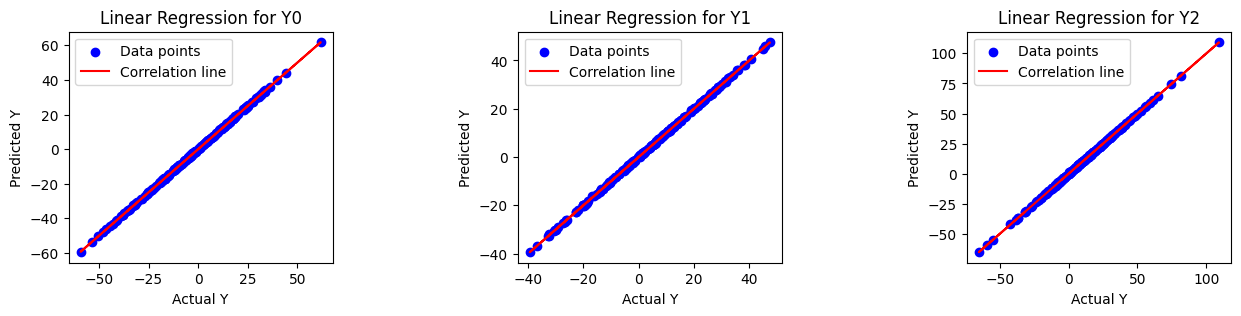

In [427]:
  # Plotting
# TODO: Make this a function 
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
for i in range(3): 
    y = calculatedDataTest[:,i]
    x = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Linear Regression for Y{}".format(i))
    axs[i].set_xlabel("Actual Y")
    axs[i].set_ylabel("Predicted Y")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()
    
plt.subplots_adjust(wspace=0.7)
plt.show()

##### Measure Metrics

In [428]:
measureMetrics(calculatedDataTest, positionDataTest)

 Pearsons correlatoin coefficient 1st co-ordinate is 0.99996, 2nd co-ordinate is 0.99994, 3rd co-ordinate is 0.99997 

 Mean Square Error of 1st co-ordinate is 0.02, 2nd co-ordinate is 0.01, 3rd co-ordinate is 0.01 

 Mean absolute Error of 1st co-ordinate is 0.1, 2nd co-ordinate is 0.09, 3rd co-ordinate is 0.08 



[array([0.99995752, 0.99993948, 0.99996987]),
 array([0.02, 0.01, 0.01]),
 array([0.1 , 0.09, 0.08])]

#### Results and Conclusion
We can see that the model performs comparably on the test and the train datasets <br> Thus we conclude that the relationship between the SensorData and the Particle position data are linear and given by  $$\textbf{positionData} = \textbf{SensorData}.\textbf{Weights}$$
where $\textbf{Weights}$ is a matrix of dimentions $(10, 3)$ which are the coefficients that minimises the MSE

We can also see the $\textbf{Pearson Coefficient}$,$\textbf{ Mean Square Error}$,$\textbf{Mean absolute Error}$ of each of the component of the position of the particle

### 2. Generalised Regression with polynomial kernel


#### Importing the data
We're importing the data from the lin_regression folder of the DATA PA folder(For me it was the index 21). 
We're also shuffling the data and splitting the data in a 70:30 split of the data and then fitting the regression model

In [429]:
polyLinearRegData = np.loadtxt("DATA PA/poly_regression/poly_regression_data_021.txt", delimiter=",", skiprows=1)

np.random.shuffle(polyLinearRegData)
splitLength = int(len(polyLinearRegData)*0.8)
trainSplit = polyLinearRegData[0:splitLength, :]
testSplit = polyLinearRegData[splitLength:, :]


In [430]:
sensorData = trainSplit[:, 0:2]
positionData = trainSplit[:, 2:5]
print("SensorData shape : {} and positionData shape: {}".format(sensorData.shape, positionData.shape))

SensorData shape : (8000, 2) and positionData shape: (8000, 3)


In [431]:
def polynomial_features(x, y, degree):
    features = []
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            features.append((x ** i) * (y ** j))
    return np.vstack(features).T

##### Preparing the model for polynomial kernels 
We'd like to train the model on a bot more complicated model than just simple linear regression. For this we'll use the polynomial kernel, i.e. for a 2 feature vector, $X_1$ and $X_2$ and a degree k, we'll get all polynomial terms of $X_1$ and $X_2$ of degree 2 as well as the polynomial terms less than 2 such as : $X_1^2$ , $X_2^2$ , $X_1X_2$, $X_1$ ,$X_2$ and $1$  
So, for the output vector $Y$, we'd have the equation as : $$ a_1*X_1^2 + a_2*X_2^2 + a_3*X_1X_2 + a_4*X_1 + a_5*X_2 + a_6* I = Y  $$
So, we need to find the coefficients, $a_1, a_2, a_3, a_4, a_5, a_6$<br>
Let's have the Matrix $A$ having the columns as these column-vectors : $X_1^2$ , $X_2^2$ , $X_1X_2$, $X_1$ ,$X_2$ and $1$ <br> let the vector $X$ be the vector the coefficients: $a_1, a_2, a_3, a_4, a_5, a_6$ <br>
So, this problem becomes a minimisation problem of $$argmin_{X} f(X) = \frac{1}{2}||AX-Y||^2$$ <br>  
<br>
Like above, To minimise the function we need to take the $\nabla f(x) = 0$, i.e. $$A^TAX - A^TY = 0 \implies A^TAX = A^TY$$ <br>
Given the polynomial kernels(polynomial terms), we'll like to perform regression on the polynomial terms.<br> We'll first generate the polynomial kernels for degree: 1, 2, 3, 4

In [432]:
feature1 = sensorData[:,0]
feature2 = sensorData[:,1]

#Generating the feature kernel for degree 1 and its weights
polynomialKernel1 = polynomial_features(feature1, feature2, 1)

#Generating the feature kernel for degree 2 and its weights
polynomialKernel2 = polynomial_features(feature1, feature2, 2)

#Generating the feature kernel for degree 3 and its weights
polynomialKernel3 = polynomial_features(feature1, feature2, 3)

#Generating the feature kernel for degree 4 and its weights
polynomialKernel4 = polynomial_features(feature1, feature2, 4)


In [433]:
postitionData1 = polynomialKernel1.T @ positionData
postitionData2 = polynomialKernel2.T @ positionData
postitionData3 = polynomialKernel3.T @ positionData
postitionData4 = polynomialKernel4.T @ positionData

In [434]:
polynomialKernel1 = polynomialKernel1.T @ polynomialKernel1
polynomialKernel2 = polynomialKernel2.T @ polynomialKernel2
polynomialKernel3 = polynomialKernel3.T @ polynomialKernel3
polynomialKernel4 = polynomialKernel4.T @ polynomialKernel4

polynomialKernel1.shape

(3, 3)

In [435]:
#Calculating the weights on the polynomial kernel
weights1, residuals, rank, s = np.linalg.lstsq(polynomialKernel1, postitionData1, rcond=None)
weights2, residuals, rank, s = np.linalg.lstsq(polynomialKernel2, postitionData2, rcond=None)
weights3, residuals, rank, s = np.linalg.lstsq(polynomialKernel3, postitionData3, rcond=None)
weights4, residuals, rank, s = np.linalg.lstsq(polynomialKernel4, postitionData4, rcond=None)


In [436]:
weights1.shape, weights2.shape, weights3.shape, weights4.shape

((3, 3), (6, 3), (10, 3), (15, 3))

##### Checking the MSE on the trained dataset

In [437]:
calculatedData1 = polynomialKernel1 @ weights1 
print("The MSE for the Polynomial kernel of degree 1 is {}".format(MSE(calculatedData1, postitionData1)))

calculatedData2 = polynomialKernel2 @ weights2 
print("The MSE for the Polynomial kernel of degree 2 is {}".format(MSE(calculatedData2, postitionData2)))

calculatedData3 = polynomialKernel3 @ weights3 
print("The MSE for the Polynomial kernel of degree 3 is {}".format(MSE(calculatedData3, postitionData3)))

calculatedData4 = polynomialKernel4 @ weights4 
print("The MSE for the Polynomial kernel of degree 4 is {}".format(MSE(calculatedData4, postitionData4)))

The MSE for the Polynomial kernel of degree 1 is [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
The MSE for the Polynomial kernel of degree 2 is [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
The MSE for the Polynomial kernel of degree 3 is [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
The MSE for the Polynomial kernel of degree 4 is [np.float64(0.0), np.float64(0.0), np.float64(0.0)]


### Testing on the test data
We use the test data to measure how well does the linear regression model work on the untrained(Test) data

In [438]:
sensorDataTest = testSplit[:, 0:2]
positionDataTest = testSplit[:, 2:5]
print("SensorDataTest shape : {} and positionDataTest shape: {}".format(sensorDataTest.shape, positionDataTest.shape))

SensorDataTest shape : (2000, 2) and positionDataTest shape: (2000, 3)


In [439]:
feature1Test = sensorDataTest[:,0]
feature2Test = sensorDataTest[:,1]

#Generating the feature kernel for degree 1 and its weights
polynomialKernel1test = polynomial_features(feature1Test, feature2Test, 1)

#Generating the feature kernel for degree 2 and its weights
polynomialKernel2test = polynomial_features(feature1Test, feature2Test, 2)

#Generating the feature kernel for degree 3 and its weights
polynomialKernel3test = polynomial_features(feature1Test, feature2Test, 3)

#Generating the feature kernel for degree 4 and its weights
polynomialKernel4test = polynomial_features(feature1Test, feature2Test, 4)


#### Graphs and metrics
We'll show the performance of the linear regression via the following metrics:
 * Pearson Correlation
 * Mean Squared Error
 * Mean Absolute Error<br>

Along with this we'll check out some correlation graphs for the predicted and the calculated outputs on the test dataset

##### Checking the Metrics on Test Data

In [440]:
calculatedData1 = polynomialKernel1test @ weights1 
print("Metrics for Polynomial kernel of degree 1")
metrics1 = measureMetrics(calculatedData1, positionDataTest)

calculatedData2 = polynomialKernel2test @ weights2 
print("\nMetrics for Polynomial kernel of degree 2")
metrics2 = measureMetrics(calculatedData2, positionDataTest)

calculatedData3 = polynomialKernel3test @ weights3 
print("\nMetrics for Polynomial kernel of degree 3")
metrics3 = measureMetrics(calculatedData3, positionDataTest)

calculatedData4 = polynomialKernel4test @ weights4 
print("\nMetrics for Polynomial kernel of degree 4")
metrics4 = measureMetrics(calculatedData4, positionDataTest)

Metrics for Polynomial kernel of degree 1
 Pearsons correlatoin coefficient 1st co-ordinate is 0.90197, 2nd co-ordinate is 0.34015, 3rd co-ordinate is 0.82108 

 Mean Square Error of 1st co-ordinate is 0.31, 2nd co-ordinate is 0.07, 3rd co-ordinate is 0.82 

 Mean absolute Error of 1st co-ordinate is 0.44, 2nd co-ordinate is 0.23, 3rd co-ordinate is 0.78 


Metrics for Polynomial kernel of degree 2
 Pearsons correlatoin coefficient 1st co-ordinate is 0.98177, 2nd co-ordinate is 0.95169, 3rd co-ordinate is 0.90153 

 Mean Square Error of 1st co-ordinate is 0.24, 2nd co-ordinate is 0.05, 3rd co-ordinate is 0.2 

 Mean absolute Error of 1st co-ordinate is 0.43, 2nd co-ordinate is 0.15, 3rd co-ordinate is 0.4 


Metrics for Polynomial kernel of degree 3
 Pearsons correlatoin coefficient 1st co-ordinate is 0.99325, 2nd co-ordinate is 0.98859, 3rd co-ordinate is 0.98055 

 Mean Square Error of 1st co-ordinate is 0.01, 2nd co-ordinate is 0.12, 3rd co-ordinate is 0.05 

 Mean absolute Error of

In [441]:
metrics1[0][2]

np.float64(0.8210839484383345)

##### Checking for the graphs

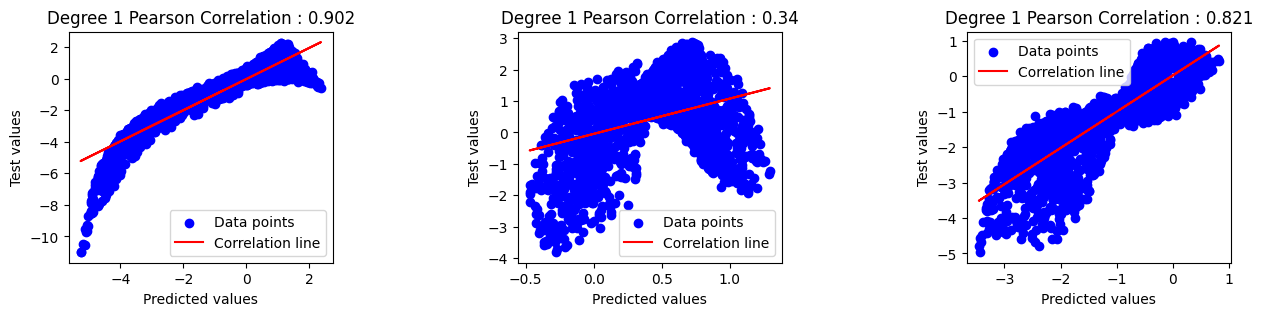

In [442]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
#Figure for degree 1
for i in range(3): 
    x = calculatedData1[:,i]
    y = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Degree 1 Pearson Correlation : {}".format(round(metrics1[0][i],3)))
    axs[i].set_xlabel("Predicted values")
    axs[i].set_ylabel("Test values")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()
    

    
plt.subplots_adjust(wspace=0.7)
plt.show()

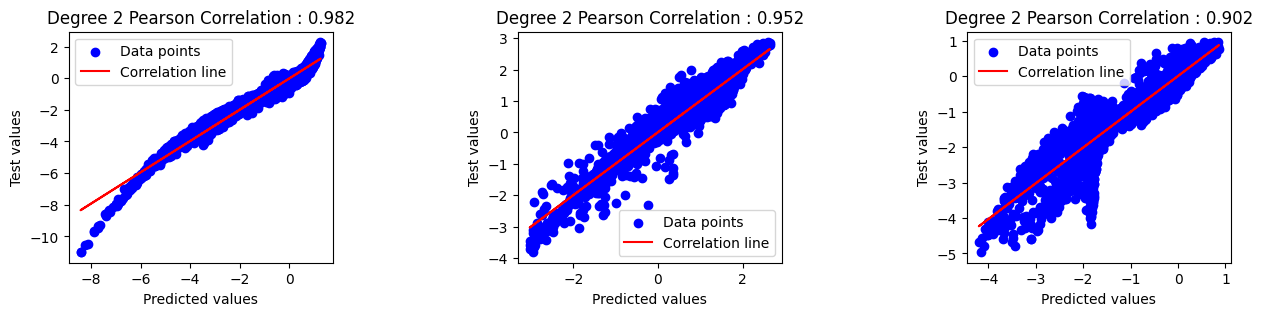

In [443]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
#Figure for degree 2
for i in range(3): 
    x = calculatedData2[:,i]
    y = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Degree 2 Pearson Correlation : {}".format(round(metrics2[0][i],3)))
    axs[i].set_xlabel("Predicted values")
    axs[i].set_ylabel("Test values")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()

plt.subplots_adjust(wspace=0.7)
plt.show()

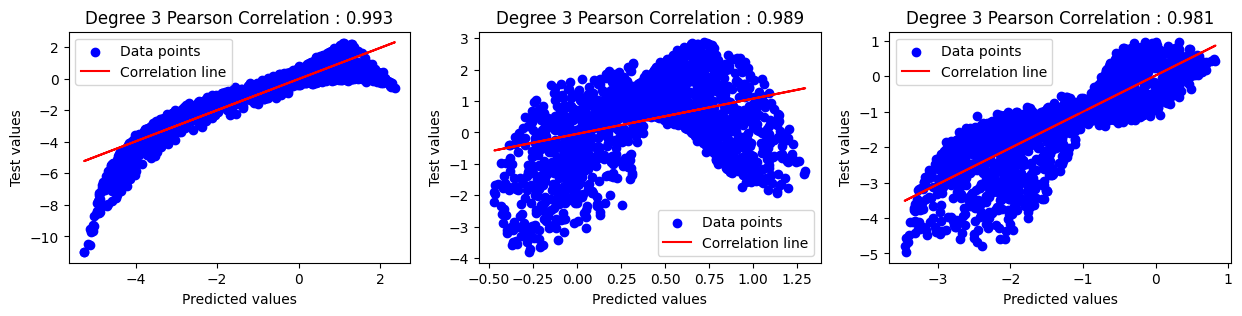

In [444]:
#Figure for degree 3
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
for i in range(3): 
    x = calculatedData1[:,i]
    y = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Degree 3 Pearson Correlation : {}".format(round(metrics3[0][i],3)))
    axs[i].set_xlabel("Predicted values")
    axs[i].set_ylabel("Test values")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()



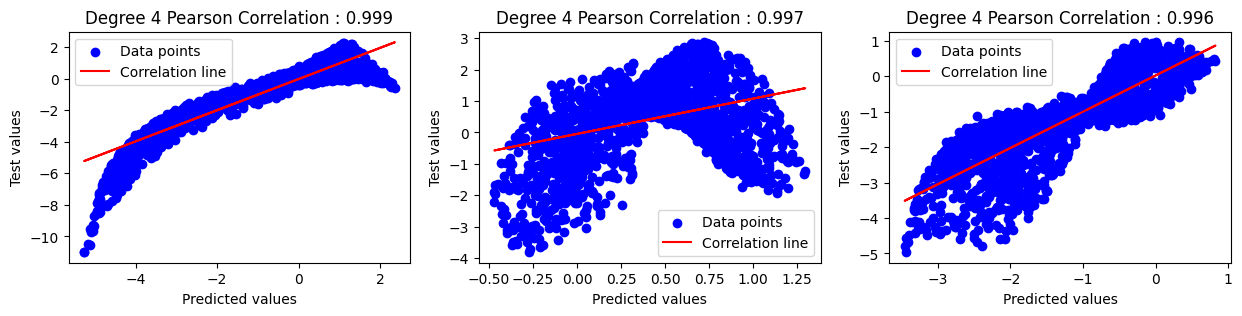

In [446]:
#Figure for degree 4
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

for i in range(3): 
    x = calculatedData1[:,i]
    y = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Degree 4 Pearson Correlation : {}".format(round(metrics4[0][i],3)))
    axs[i].set_xlabel("Predicted values")
    axs[i].set_ylabel("Test values")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")

    axs[i].legend()

#### Conclusion and Result
We can see that pearson's correlation coefficient decreses as we increase the degree, as evidient from the metrics. But it seen observed that the predicted results fit the actual values best for the degree 2

## 1.2 (Linear) Constrained
So, we're given the optimisation problem from the $\textbf{Multilinear Regression}$ problem, so we've to solve the following the optimization problem problem for $X$ as $$argmin_{X} f(X) = \frac{1}{2}||AX-Y||^2$$ <br>
Where: 
* $A$ is the $\textbf{800 x 11 }$ matrix consisting of the bias term and the other 10 columns are the sensor data
* $X$ is a $\textbf{11 x 3 }$ vector consisting of the appropriate coefficients that minimiseds the expression above
* $X$ is a $\textbf{800 x 3 }$ vector consisting of the 3 co-ordinates of the position vector

In addition to this, we've the constrains given by: $$CX = D - (1)$$
Where: 
* $C$ is the $\textbf{3 x 11 }$ matrix consisting of the bias term and the other 10 columns are the constraints data
* $X$ is a $\textbf{11 x 3 }$ vector consisting of the appropriate coefficients that minimiseds the expression above and the constraints
* $D$ is a $\textbf{3 x 3 }$ matrix consisting of the constraints output horizontal stacked 3 times

We take the $\mathcal{L}(X, \mu) = \frac{1}{2}||AX-Y||^2 + \mu(CX - D)$
Now taking the derivative of  $\mathcal{L}(X, \mu)$ and equating it to 0, we have $$A^TAX - X^T\mu = A^TY - (2)$$ 

We have a system of linear equation and we need to solve $1$ and $2 $ for $X$ to find the solution of the constraint problem. Thus rewriting the entire thing into a Matrix equation: 

\begin{gather}
 \begin{bmatrix} C & 0 \\ A^TA & -A^T \end{bmatrix}
 \begin{bmatrix} X \\ \mu \end{bmatrix}
 =
  \begin{bmatrix} D \\ A^TY \end{bmatrix}
\end{gather}
<br> Solving this, would give us the X that minimises the original optimisatio problem and adheres to the constrains

#### Importing the data
We're importing the data from the lin_regression folder of the DATA PA folder(For me it was the index 21). 
We're also shuffling the data and splitting the data in a 80:20 split of the data.<br> We'll import the constraints and make some adjustments

In [447]:
constraintsMatrix = np.loadtxt("DATA PA/constraints/constraints_021.txt", delimiter=",", skiprows=1, max_rows=3)
constraintsResult = np.loadtxt("DATA PA/constraints/constraints_021.txt", delimiter=",", skiprows=4)

In [448]:
constraintsMatrix.shape, constraintsResult.shape

((3, 10), (3,))

In [449]:
#Adding Bias term to the matrix
constraintsMatrix = np.hstack((constraintsMatrix, np.zeros(len(constraintsMatrix)).reshape(len(constraintsMatrix),1)))
constraintsMatrix.shape

(3, 11)

In [450]:
constraintsMatrix

array([[ 1.762616,  7.954275,  7.830615,  6.31675 , -9.282208,  3.835152,
        -2.426381,  0.370219,  3.159029, -6.122996,  0.      ],
       [-4.553672,  4.372119,  5.660072,  7.006553,  5.504898, -9.266714,
        -7.666125,  5.025614, -5.215636, -4.90388 ,  0.      ],
       [ 7.152511,  8.995581,  1.233737, -6.42439 ,  5.405039, -0.152379,
         2.625061,  6.789958, -0.779212, -0.041199,  0.      ]])

Now, we'll import the data and add the bias terms

In [451]:
linearRegData = np.loadtxt("DATA PA/lin_regression/regression_data_021.txt", delimiter=",", skiprows=1)
np.random.shuffle(linearRegData)
splitLength = int(len(linearRegData)*0.8)
trainSplit = linearRegData[0:splitLength, :]
testSplit = linearRegData[splitLength:, :]


In [452]:
#Adding the bias term in the equation
sensorData = trainSplit[:, 0:10]
positionData = trainSplit[:, 10:13]
print("SensorData shape : {} and positionData shape: {}".format(sensorData.shape, positionData.shape))

SensorData shape : (8000, 10) and positionData shape: (8000, 3)


In [453]:
sensorData = np.hstack((sensorData, np.ones(len(sensorData)).reshape(len(sensorData),1)))
sensorData.shape

(8000, 11)

We'll need to form a new matrix from the existing data.<br>
We'll first construct the upper part of the Matrix

In [454]:
zeros = np.zeros(len(constraintsMatrix)**2).reshape(len(constraintsMatrix), len(constraintsMatrix))
zeros.shape

(3, 3)

In [455]:
upperMatrix = np.hstack((constraintsMatrix, zeros))
upperMatrix.shape

(3, 14)

Moving onto the lower Matrix

In [456]:
lowerFirsthalf = sensorData.T @ sensorData
lowerFirsthalf.shape

(11, 11)

In [457]:
lowerSecondHalf = -constraintsMatrix.T
lowerSecondHalf.shape

(11, 3)

In [458]:
lowerMatrix = np.hstack((lowerFirsthalf, lowerSecondHalf))
lowerMatrix.shape

(11, 14)

In [459]:
upperMatrix.shape

(3, 14)

In [460]:
fullmatrix = np.vstack((upperMatrix, lowerMatrix))
fullmatrix.shape

(14, 14)

Constructing the Output Vector now

In [461]:
constraintsResult = np.expand_dims(constraintsResult, axis=1)
constraintsResult.shape

(3, 1)

In [462]:
upperVector = constraintsResult
upperVector = np.hstack((upperVector,constraintsResult))
upperVector = np.hstack((upperVector,constraintsResult))
lowerVector = sensorData.T @ positionData

In [463]:
OutputVector = np.vstack((upperVector, lowerVector))
OutputVector

array([[-9.57721460e+01, -9.57721460e+01, -9.57721460e+01],
       [ 1.39485220e+01,  1.39485220e+01,  1.39485220e+01],
       [ 1.28400869e+02,  1.28400869e+02,  1.28400869e+02],
       [ 5.57640377e+04,  8.12910367e+04,  4.87935882e+04],
       [-4.17636021e+04,  1.04770667e+04,  6.31491278e+04],
       [ 7.68699640e+04,  1.43370258e+04, -6.25685275e+04],
       [ 3.93116763e+04, -5.13587250e+04, -7.44448764e+03],
       [-4.14269092e+04, -3.89640448e+04,  5.06201678e+04],
       [-2.04803133e+04,  6.24968194e+04,  6.65572716e+04],
       [-7.25896956e+04,  4.15647333e+04, -7.33172274e+04],
       [-5.10284928e+04, -3.42760267e+04,  4.65666866e+04],
       [-6.98684112e+04,  2.27795474e+04,  5.00657886e+04],
       [-2.54665361e+04, -4.62441649e+04,  6.61656923e+04],
       [-2.01067852e+04,  2.62123448e+04,  8.00865140e+04]])

In [464]:
fullmatrix.shape

(14, 14)

In [465]:
# weights = np.linalg.inv(fullmatrix) @ OutputVector
weights, residuals, rank, s = np.linalg.lstsq(fullmatrix, OutputVector, rcond=None)
# np.linalg.inv(fullmatrix) @ OutputVector

In [466]:
weights = np.array(weights)
print(weights)
weights.shape

[[ 1.35540061e+01  6.15933684e+00  3.85372168e+00]
 [-3.13505890e+00 -3.81023557e-01  5.81344316e+00]
 [ 4.32499984e+00 -7.88004272e-02 -8.75750363e+00]
 [-6.37787449e+00 -6.51734024e+00 -5.47229347e-02]
 [ 4.24904250e+00  7.10921450e+00  9.71852928e+00]
 [-2.90307165e+00 -2.27240768e+00  5.16247722e+00]
 [-3.25854990e+00  1.47823700e+00 -1.09024180e+01]
 [-1.35315634e+00  5.93359384e-02  5.80620524e+00]
 [-9.97462714e+00 -3.54171354e+00  4.11743592e+00]
 [ 2.22549044e+00 -4.51493851e+00  8.34293441e+00]
 [-2.58102608e+00  3.11839561e+00  9.62466776e+00]
 [-5.00719280e+03 -6.19775403e+03 -2.07745180e+03]
 [-1.92441058e+03  6.02554380e+03  1.99778655e+03]
 [ 7.16728871e+03  8.50605825e+02 -1.11457830e+03]]


(14, 3)

In [467]:
print(weights.shape)
actualWeights = weights[0:11]

print(actualWeights.shape)
print(actualWeights)

(14, 3)
(11, 3)
[[ 13.55400614   6.15933684   3.85372168]
 [ -3.1350589   -0.38102356   5.81344316]
 [  4.32499984  -0.07880043  -8.75750363]
 [ -6.37787449  -6.51734024  -0.05472293]
 [  4.2490425    7.1092145    9.71852928]
 [ -2.90307165  -2.27240768   5.16247722]
 [ -3.2585499    1.478237   -10.90241795]
 [ -1.35315634   0.05933594   5.80620524]
 [ -9.97462714  -3.54171354   4.11743592]
 [  2.22549044  -4.51493851   8.34293441]
 [ -2.58102608   3.11839561   9.62466776]]


##### Testing on the data

In [468]:
sensorDataTest = testSplit[:, 0:10]
sensorDataTest = np.c_[sensorDataTest, np.ones(len(sensorDataTest)).reshape(len(sensorDataTest),1)]

positionDataTest = testSplit[:, 10:13]
print("SensorData shape : {} and positionData shape: {}".format(sensorDataTest.shape, positionDataTest.shape))

SensorData shape : (2000, 11) and positionData shape: (2000, 3)


In [469]:
predictedDataTest = sensorDataTest @ actualWeights
measureMetrics(predictedDataTest, positionDataTest)

 Pearsons correlatoin coefficient 1st co-ordinate is 0.5372, 2nd co-ordinate is 0.28459, 3rd co-ordinate is 0.95982 

 Mean Square Error of 1st co-ordinate is 6.1, 2nd co-ordinate is 45.88, 3rd co-ordinate is 42.97 

 Mean absolute Error of 1st co-ordinate is 2.19, 2nd co-ordinate is 5.26, 3rd co-ordinate is 4.24 



[array([0.53720229, 0.28459215, 0.95982243]),
 array([ 6.1 , 45.88, 42.97]),
 array([2.19, 5.26, 4.24])]

##### Graphs

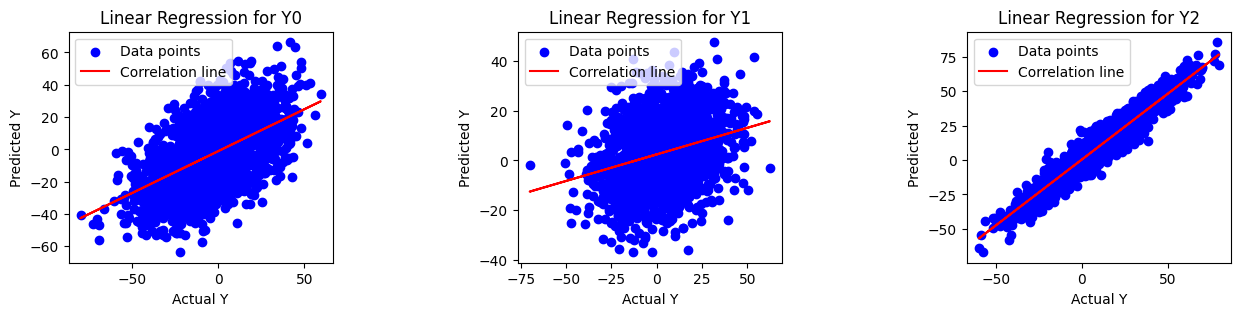

In [470]:
  # Plotting
# TODO: Make this a function 
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
for i in range(3): 
    y = predictedDataTest[:,i]
    x = positionDataTest[:,i]
    # axs[i].set_figure(figsize=(3, 3))
    axs[i].scatter(x, y, color="b", label="Data points")
    axs[i].set_title("Linear Regression for Y{}".format(i))
    axs[i].set_xlabel("Actual Y")
    axs[i].set_ylabel("Predicted Y")
    
    
    
    # Optional: Line of best fit
    m, b = np.polyfit(x, y, 1)
    axs[i].plot(x, m * x + b, color="red", label="Correlation line")
    axs[i].legend()
    
plt.subplots_adjust(wspace=0.7)
plt.show()

# 2. Principle Component Analysis

## 2.1 PCA Implementation
With PCA, what we'd like to do is to reduce the dimentionality of the data via reducing the basis vector. We do this for the following reasons:
* $\textbf{Dimentionality reduction}$: By selecting only the top 𝑝 p components, we can project the data into a lower-dimensional space that retains the most critical information. Reducing dimensions helps to simplify models, decrease computational load, and potentially improve performance
*  $\textbf{Maximizing Explained Variance}$: The eigenvalues of the covariance matrix represent the amount of variance captured by each principal component. The largest eigenvalues correspond to directions (principal components) in which the data has the highest variability.Selecting the top p eigenvalues (and their eigenvectors) helps to maximize the variance retained in the reduced representation of the data. This ensures that the reduced dimensions capture as much of the dataset's original structure as possible.
* $\textbf{Noise Reduction}$: The components associated with smaller eigenvalues often capture less meaningful variance, sometimes attributed to noise in the data. By ignoring these smaller eigenvalues, we can reduce the impact of noise and focus on the data's underlying patterns.
* $\textbf{Simplifying Interpretation}$: Fewer dimensions make it easier to interpret and visualize the data, especially in exploratory data analysis. For example, using only the top two or three components enables plotting high-dimensional data in 2D or 3D space, providing a visual overview of the data's structure and relationships.
### Importing the data
To import the $\textbf{IDX3\_UBYTE}$ data from the files, we'll define the following functions to read the input datatype and convert it into the operatable numpy matrixes

In [471]:
import numpy as np

def read_idx3_ubyte_images(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number (first 4 bytes)
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the number of images (next 4 bytes)
        num_images = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the number of rows (next 4 bytes)
        num_rows = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the number of columns (next 4 bytes)
        num_cols = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the image data and reshape it to (num_images, num_rows, num_cols)
        image_data = np.frombuffer(f.read(), dtype=np.uint8).reshape((num_images, num_rows * num_cols))   
    return image_data

def read_idx1_ubyte_labels(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number (first 4 bytes)
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the number of labels (next 4 bytes)
        num_labels = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the label data as a 1D array of unsigned bytes
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        
    return labels


#### a. Standardize Data
We'll like to center the data by substracting the mean before operating on them, hence we define the following to do the same

In [472]:
def standardize_images(images) :
    mean = np.mean(images, axis = 0)
    standardizedImage = images - mean
    return standardizedImage,mean

##### b. Compute the PCA Eigen Values
Now, we'd like to calculate the get the top eigen-values and the corresponding eigen-vectors to form the new basis. The top p eigenvalues and eigenvectors help us reduce dimensionality, retain essential information (variance), reduce noise, and simplify interpretation. This is why we prioritize the top components in PCA rather than using all dimensions, which might introduce unnecessary complexity and noise.

In [473]:
def compute_pca_eigen(X):
    #Calculate the covariance matrix
    covariance_matrix = np.cov(X, rowvar=False)
    
    #Eigen decomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    #Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    
    # Select the top n_components
    explained_variance_ratio = sorted_eigenvalues / np.sum(eigenvalues)
    cumulative_variance = np.cumsum(explained_variance_ratio)
    n_components = np.argmax(cumulative_variance >= 0.95) + 1
    principal_components = sorted_eigenvectors[:, :n_components]
    print(principal_components.shape)
    
    return principal_components

#### c. Reconstruct the images

In [474]:
def reconstruct_images(X, components, mean):
    projected_data = np.dot(X, components)  # X * components
    reconstructed_images = np.dot(projected_data, components.T) + mean
    
    return reconstructed_images

In [475]:
def processImage(images):
    standardizedImages, mean = standardize_images(images)
    principal_components = compute_pca_eigen(images)
    reconstrucedimages = reconstruct_images(standardizedImages, principal_components, mean)
    return reconstrucedimages, principal_components

#### d. Reconstructing the Images

##### Firstly, We'd have train the data from MNIST.

In [476]:
trainMNSIT = np.loadtxt("DATA PA/MNIST_CSV/mnist_train.csv", delimiter=",")
testMNSIT = np.loadtxt("DATA PA/MNIST_CSV/mnist_test.csv", delimiter=",")

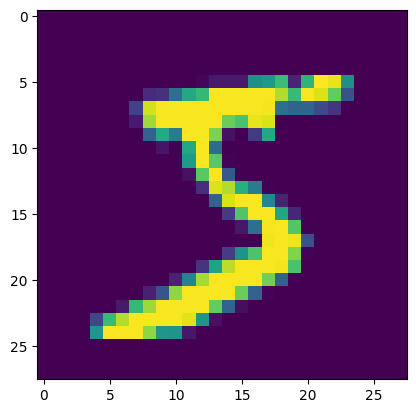

In [477]:
trainImagesMNIST = trainMNSIT[:,1:]
trainLabelsMNIST = trainMNSIT[:,0]

testImagesMNIST = testMNSIT[:,1:]
testLabelsMNIST = testMNSIT[:,0]

plt.imshow(trainImagesMNIST[0].reshape(28, 28))

In [478]:
reconstrucedimagesMNIST, principal_componentsMNSIT = processImage(trainImagesMNIST)

(784, 154)


In [479]:
reconstrucedimagesMNIST.shape

(60000, 784)

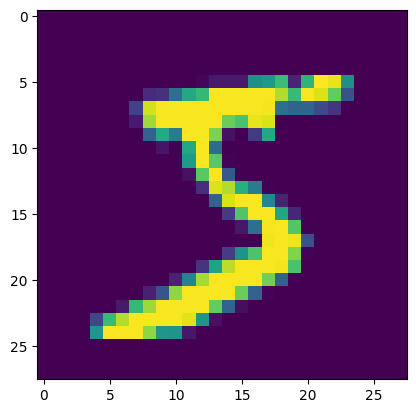

In [480]:
plt.imshow(trainImagesMNIST[0].reshape(28, 28))

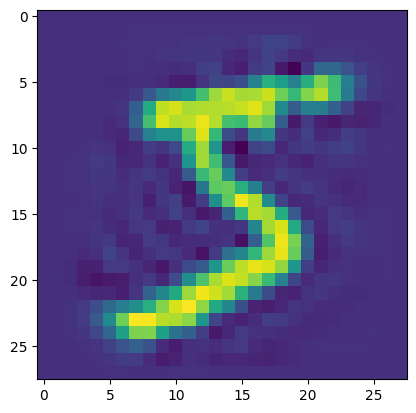

In [481]:
plt.imshow(reconstrucedimagesMNIST[0].reshape(28, 28))

##### Now, we'll train the CIFAR-10 dataset

In [482]:
import numpy as np
import pickle
import os

def load_cifar10_batch(filename):
    """Load a single batch of CIFAR-10."""
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
        images = batch[b'data']  
        labels = batch[b'labels'] 
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        return images, np.array(labels)

def load_cifar10(data_dir):
    """Load all CIFAR-10 batches."""
    images_list, labels_list = [], []
    for i in range(1, 6):  # Loop over the 5 data batches
        batch_file = os.path.join(data_dir, f"data_batch_{i}")
        images, labels = load_cifar10_batch(batch_file)
        images_list.append(images)
        labels_list.append(labels)
    
    # Combine all batches
    X_train = np.concatenate(images_list, axis=0)
    y_train = np.concatenate(labels_list, axis=0)
    
    # Load the test batch
    test_file = os.path.join(data_dir, "test_batch")
    X_test, y_test = load_cifar10_batch(test_file)
    
    return X_train, y_train, X_test, y_test

# Path to the extracted CIFAR-10 directory
data_dir = "DATA PA\cifar-10-batches-py"
trainImagesCIFAR, trainLabelsCIFAR, testImagesCIFAR, testLabelsCIFAR = load_cifar10(data_dir)

print(f"Training data shape: {trainImagesCIFAR.shape}, Training labels shape: {trainLabelsCIFAR.shape}")
print(f"Test data shape: {testImagesCIFAR.shape}, Test labels shape: {testLabelsCIFAR.shape}")


Training data shape: (50000, 32, 32, 3), Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000,)


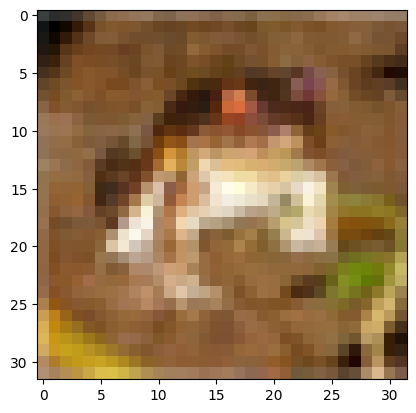

In [483]:
plt.imshow(trainImagesCIFAR[0])

In [484]:
trainImagesCIFAR = trainImagesCIFAR.reshape(len(trainImagesCIFAR), 32*32*3)
testImagesCIFAR = testImagesCIFAR.reshape(len(testImagesCIFAR), 32*32*3)

In [485]:
trainImagesCIFAR.shape

(50000, 3072)

In [486]:
# reconstrucedimagesCIFAR = processImage(trainImagesCIFAR)

# 3.Stationary distribution of a Markov Chain
#### Importing the transition matrix

In [488]:
transitionMatrix = np.loadtxt("DATA PA/transition_matrices/P_021.txt")
transitionMatrixT = transitionMatrix.T

#### Solve directly using the system of linear equations
We're given the matrix A, we'd like to solve for $\pi$ in the following equations:
$$\pi^T\textbf{A} = \pi^T -(1)$$
$$\pi^T\textbf{I} = I - (2)$$
Consider equation $(1)$, we take transpose on both the sides $$(\pi^T\textbf{A})^T = (\pi^T)^T \implies A^T\pi = \pi \implies (A^T - I)\pi = 0$$ Taking the transpose on eq$(2)$, we've $$I^T \pi = I$$We'll model it as a a system of linear equation as:

\begin{gather}
 \begin{bmatrix} P^T -I \\ I^T \end{bmatrix}
 \begin{bmatrix} \pi  \end{bmatrix}
 =
  \begin{bmatrix} 0 \\ I \end{bmatrix}
\end{gather}

Solving this linear equation, we can get the value of $\pi$,

#### Solving the linear equation for the value of $\pi$

##### Creating the Matrix for the linear equation

In [489]:
I_m = np.eye(len(transitionMatrix))
O = np.zeros(len(transitionMatrix)).reshape(len(transitionMatrix),1)
upperHalf = transitionMatrix.T - I_m
I_v = np.ones(len(transitionMatrix)).reshape(len(transitionMatrix),1)
lowerhalf = I_v.T

In [490]:
fullVector = np.vstack((upperHalf, lowerhalf))

In [491]:
fullVector.shape

(101, 100)

In [492]:
outputVector = np.vstack((O,np.ones(1).reshape(1,1)))
outputVector.shape

(101, 1)

In [493]:
import time
prev_time =  time.time()
pieLE, x, y,z = np.linalg.lstsq(fullVector, outputVector)
curr_time = time.time()


In [494]:
timeDiffLE = curr_time - prev_time 

#### Solve using the power method

In [495]:
def powerMethod(A, pie, tol = 1e-6, max_iter = 10000): 
    
    for i in range(max_iter): 
        pie_pred = A.T @ pie     
        if np.max(np.abs(pie - pie_pred)) < tol: 
            return pie_pred, i + 1
        pie = pie_pred  

In [496]:
pie_initial = np.random.dirichlet(np.ones(100),size=1).T
prev_time =  time.time()
piePM = powerMethod(transitionMatrix, pie_initial)
curr_time = time.time()
timeDiffPM =  curr_time - prev_time 

#### Verifying the data from both methods
##### Verifying for the solution from directly solving the system of linear equations
$\textbf{a.} ||\pi^T A - \pi^T||_1 = 0$ 

In [497]:
print(np.linalg.norm((pieLE.T @ transitionMatrix - pieLE.T).squeeze()))

2.8985536025724916e-11


$\textbf{b.} \sum_{i = 1}^n\pi_i = 1  $

In [498]:
print(pieLE.sum())

1.000000000000001


##### Verifying for the solution from power method
$\textbf{a.} ||\pi^T A - \pi^T||_1 = 0$ 

In [499]:
print(np.linalg.norm((piePM[0].T @ transitionMatrix - piePM[0].T).squeeze()))

4.160654680508706e-08


$\textbf{b.} \sum_{i = 1}^n\pi_i = 1  $

In [500]:
print(piePM[0].sum())

1.0000000016781057


$\textbf{c. Number of iterations for convergance}$

In [501]:
piePM[1]

5

$\textbf{d. Compare execution times for both methods.}$<br>
$\textbf{Linear Equation Time Difference}$

In [502]:
timeDiffLE

0.27771830558776855

$\textbf{Power Method Time Difference}$

In [503]:
timeDiffPM

0.001007080078125

##### Analyze and compare:
###### Accuracy of approaches
The linear system of equation approach yeilds a norm of difference as  $2.89 \times 10^{-11}$ whereas the power method yeilds an  norm of difference as  $6.47 \times 10^{-8}$. We see that the prior methods yeilds a closer result than the latter.
###### Computational efficiency
The power methods needs 5 interation to converge to the result. But the linear system of equation  needs more time to compute the result as compared to power method 
###### Impact of matrix size 

# 4. Spectral Norm of a Matrix

#### Power Iteration

In [504]:
def powerIteration(G, maxIter): 
    prev_time = time.time()
    U = np.expand_dims(np.random.rand(len(G[0])), axis = 1)
    sigma = []
    for i in range(maxIter):
        calVectorV = G @ U
        scalerV = 1/np.linalg.norm(calVectorV, ord = 2)
        V = scalerV * calVectorV
        calVectorU = G.T @ V
        scalerU = 1/np.linalg.norm(calVectorU, ord = 2)
        U = scalerU * calVectorU
        result = (G @ U).T @ V
        sigma.append(result.item())
    curr_time = time.time()
    return result, curr_time - prev_time, sigma

#### Gram Iteration

In [505]:
def gramIteration(G, maxIter): 
    prev_time = time.time()
    r = 0
    m,n = G.shape
    if n > m :
        G = G.T
    sigma = []
    for i in range(maxIter):
        froNorm = np.linalg.norm(G, 'fro')
        r = 2 * (r + np.log(froNorm))  
        scalar = 1/froNorm
        G = scalar * G
        G = G.T @ G 
        twoExp = 2 ** (-i-1)
        froNorm = np.linalg.norm(G, 'fro')
        norm = froNorm**(twoExp) 
        final_norm =  norm * np.exp(twoExp*r)
        sigma.append(final_norm.item())

    twoExp = 2 ** (-maxIter)
    froNorm = np.linalg.norm(G, 'fro')
    norm = froNorm**(twoExp) 
    final_norm =  norm * np.exp(twoExp*r)
    sigma.append(final_norm.item())
    curr_time = time.time()
    return final_norm , curr_time - prev_time, sigma

#### Data Import
$\textbf{1. Initialize the ,G, from the spectral\_norm\_matrices folder}$

In [506]:
matrixG = np.loadtxt("DATA PA/spectral_norm_matrices/matrix_021.txt")

$\textbf{2. Power iterations on G for at least 2000 iterations using Power Iteration}$

In [507]:
spectralNorm, timeDiff, pow_sigma= powerIteration(matrixG, 2000)
spectralNorm, timeDiff

(array([[42.1367859]]), 0.4148845672607422)

$\textbf{3. Gram Iteration on G for at least 15 iterations using Gram Iteration}$

In [508]:
gramNorm, timeDiff, gram_sigma = gramIteration(matrixG, 15)
gramNorm, timeDiff

(np.float64(42.13678590449723), 0.05385565757751465)

#### 5. Average runtimes of the 2 algorithms if they're run 100 times
##### Average Run time for Power Iteration

In [ ]:
timeDiffSum = 0
sigma_power_final = []
for i in range(100):
    spectralNorm, timeDiff, sigma= powerIteration(matrixG, 2000)
    sigma_power_final.append(sigma)
    timeDiffSum = timeDiffSum + timeDiff
print(timeDiffSum/100)

##### Average Run time for Gram Iteration

In [ ]:
timeDiffSum = 0
gram_power_final = []
for i in range(100):
    gramNorm, timeDiff, sigma = gramIteration(matrixG, 15)
    timeDiffSum = timeDiffSum + timeDiff
    gram_power_final.append(sigma)
print(timeDiffSum/100)

In [ ]:
np.array(gram_power_final)

So, the average runtime for $\textbf{Power Iterations}$ is $0.366$ seconds and average runtime for $\textbf{Gram Iterations}$ is  $0.036$ seconds
We can see that the difference between the Power Iteration and Gram Iterations is $0.33$ seconds

#### 6. Use numpy’s svd method to find spectral norm of G


In [ ]:
SVD = np.linalg.svd(matrixG)
SVD[0].shape, SVD[1].shape, SVD[2].shape

In [ ]:
SVD[1][0]

As the maximum singular value of the matrix is spectral norm, we can conclude the spectral norm = 42.13

#### 7. Log-log scale for spectral norm computation, comparing Power iteration and Gram iteration

In [ ]:
sig_pow = np.array(sigma_power_final)


In [ ]:
sig_gram = np.array(gram_power_final)

In [ ]:
G_svd=np.linalg.svd(matrixG,compute_uv=False)[0]
print(G_svd)

In [ ]:
range_gram=range((sig_gram.shape[1]))
range_pow=range((sig_pow.shape[1]))
pow_diff=sig_pow-G_svd
gram_diff=sig_gram-G_svd
 
pow_diff_abs=np.abs(pow_diff)
gram_diff_abs=np.abs(gram_diff)
 
pow_mean=np.mean(pow_diff_abs,axis=0)
gram_mean=np.mean(gram_diff_abs,axis=0)
pow_svd=np.std(pow_diff_abs,axis=0)
gram_svd=np.std(gram_diff_abs,axis=0)
 
 
plt.figure(figsize=(12, 6))
plt.title("Graph")
plt.loglog(range_pow,pow_mean,color='red')
plt.fill_between(range_pow,pow_mean-pow_svd,pow_mean+pow_svd,color='r', alpha=0.3)
plt.loglog(range_gram,gram_mean,color='blue')
plt.fill_between(range_gram,gram_mean-gram_svd,gram_mean+gram_svd,color='green')
plt.ylabel('Sigma Diff')
plt.xlabel('Gram Iterations')
 
plt.show()

#### 8. log-log scale for spectral norm computation, comparing power iteration and Gram iteration

In [ ]:
for row in pow_diff_abs:
    plt.loglog(range_pow, row, color="r")

for row in gram_diff_abs:
    plt.loglog(range_gram, row, color="blue")

plt.ylabel('Sigma Diff')
plt.xlabel('Gram Iterations')
plt.show()